In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.losses import MSE

In [4]:
img = np.array(load_img("../datasets/strange.jpg", target_size=(50, 50)))

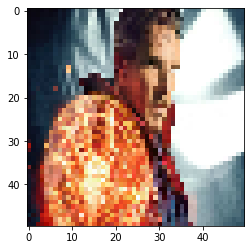

In [5]:
plt.imshow(img)

In [6]:
gray = img / 255

In [7]:
flatten = gray.flatten()

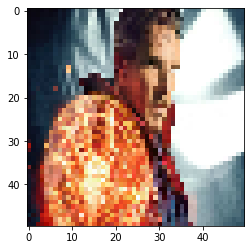

In [8]:
plt.imshow(gray)

In [9]:
gray.max()

1.0

In [10]:
population = np.random.uniform(0, 1, (1000, *flatten.shape))

In [11]:
population.shape

(1000, 7500)

In [12]:
population.min(), population.max()

(1.5735150959983457e-09, 0.9999993446235161)

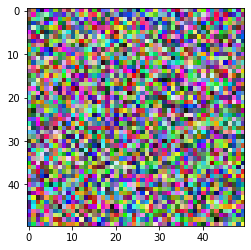

In [13]:
plt.imshow(population[100].reshape(*gray.shape))

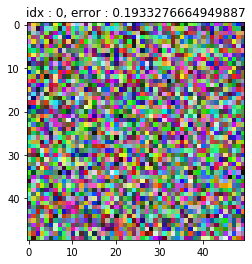

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


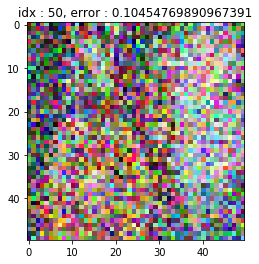

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


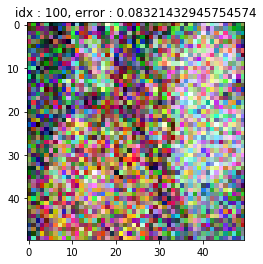

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


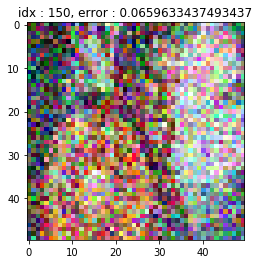

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


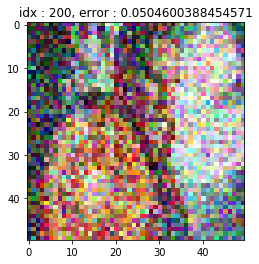

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


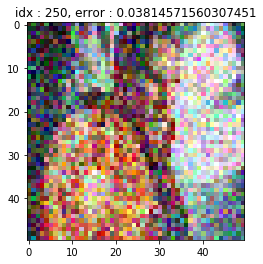

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


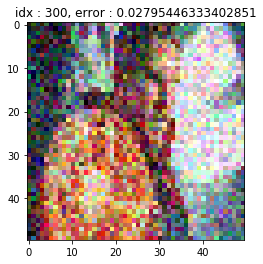

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


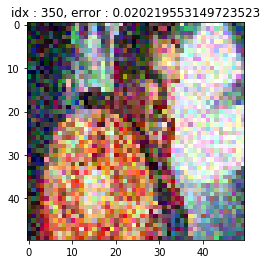

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


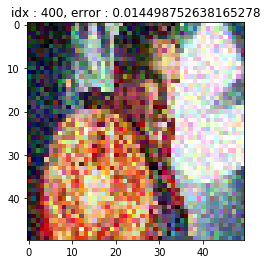

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


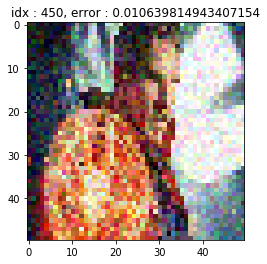

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


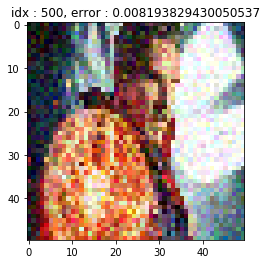

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


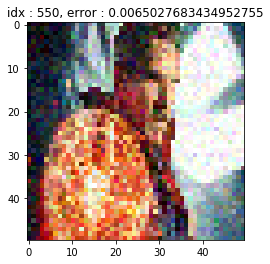

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


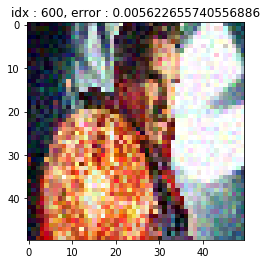

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


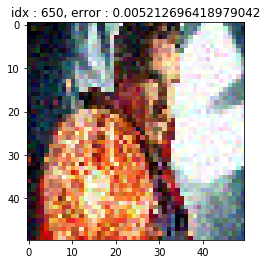

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


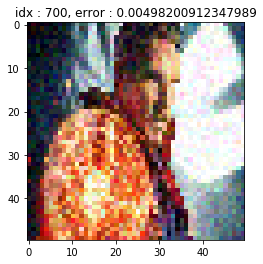

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


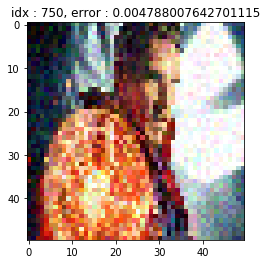

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


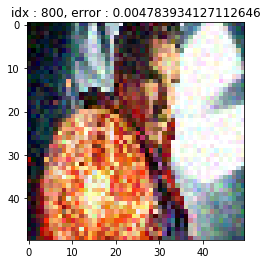

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


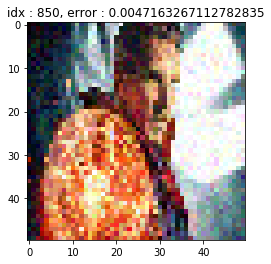

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


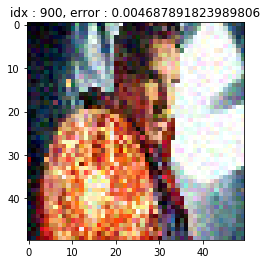

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


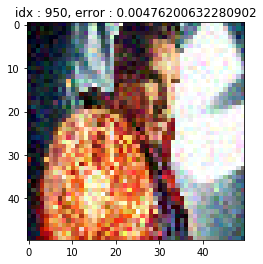

In [14]:
for i in range(1000):

    errors = MSE(flatten, population).numpy()

    fittest_idx = errors.argsort()[:20]

    fittest = population[fittest_idx]

    parent_one = fittest[np.random.randint(0, fittest.shape[0], population.shape[0])]

    parent_two = fittest[np.random.randint(0, fittest.shape[0], population.shape[0])]

    select_one = np.random.randint(0, 2, parent_one.shape)
    select_two = 1 - select_one

    repop = parent_one * select_one + parent_two * select_two

    mutatio_vals = np.random.randn(*population.shape)*.01

    population = repop + mutatio_vals

    if i % 50 == 0:
        plt.figure()
        plt.title("idx : {}, error : {}".format(i, errors[fittest_idx[0]]))
        plt.imshow(fittest[0].reshape(*gray.shape))
        plt.show()
